In [1]:
# UNIVERSIDAD LATINA DE PANAMÁ - 2024-1 / INTELIGENCIA ARTIFICIAL

#Laboratorio No.2
#GRUPO 3: Getsie Sayas, Iván González 

In [2]:
#1. Google Play Store apps and reviews

#Read in dataset
import pandas as pd 

all_apps= pd.read_csv('DATASETS/LAB 2/APPS.csv', index_col=0)

#Drop duplicated apps 

apps= all_apps.drop_duplicates()

#Print the total number of apps
print('Total of apps in the dataset= ', all_apps['App'].count())
print('Total of non-duplicated apps in the dataset= ', apps['App'].count())

#Have a look at a random sample of five rows
apps.sample(5)


Total of apps in the dataset=  9659
Total of non-duplicated apps in the dataset=  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3995,CL Mobile - Classifieds for Craigslist,SHOPPING,4.4,27275,8.3,"1,000,000+",Free,0,Teen,Shopping,"July 30, 2018",27500000,4.1 and up
7336,FAV KWGT,PERSONALIZATION,4.9,88,66.0,"1,000+",Paid,$0.99,Everyone,Personalization,"July 26, 2018",8,5.0 and up
7048,bz Basellandschaftliche News,NEWS_AND_MAGAZINES,2.8,33,33.0,"1,000+",Free,0,Everyone,News & Magazines,"June 6, 2018",1.4.0,5.0 and up
4254,Cook Baked Lasagna,FAMILY,4.2,56259,23.0,"10,000,000+",Free,0,Everyone,Casual,"March 14, 2018",4,4.0 and up
8501,DK Childcare Centers,LIFESTYLE,NaN,0,13.0,500+,Free,0,Everyone,Lifestyle,"April 2, 2018",1.0.2,4.1 and up


In [3]:
#2.Data Cleaning

#List of characters to remove
bad_chars = [',','+', '$']

#List of column names to clean 
dirty_columns = ['Installs', 'Price']

#Loops for each column and char to remove

for col in dirty_columns:
    for char in bad_chars: 
        apps[col] = apps[col].apply(lambda x:x.replace(char,''))

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB
None


In [4]:
#3. Correcting data types 

import numpy as np

#Convert Installs and Price to flotat data type 

apps['Price'] = apps['Price'].astype(np.float64)
apps['Installs'] = apps['Installs'].astype(np.float64)

#Checking gtypes of the apps dataframe

print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
#4. Exploring app categories

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)


Number of categories =  33


In [7]:
#5. Distribution of Apps Ratings

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram( x = apps['Rating'])]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


Text(0.5, 0.98, 'Price vs Rating')

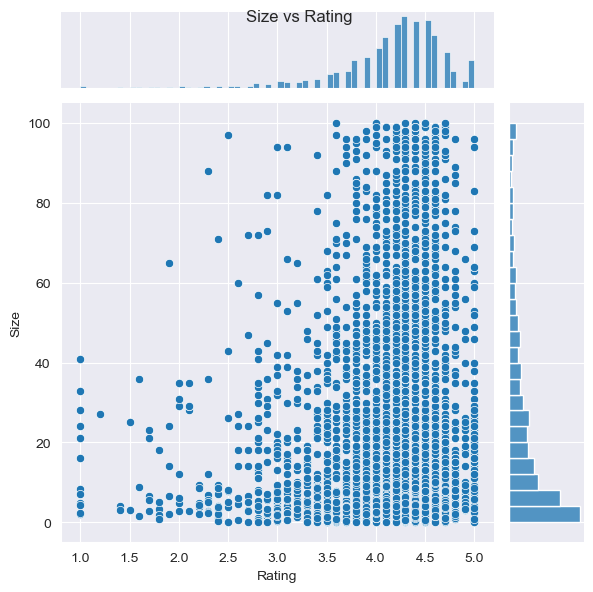

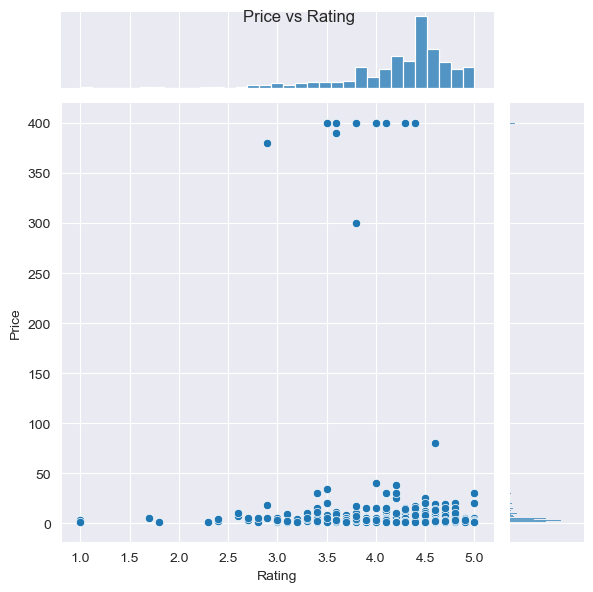

In [15]:
#6. Size and Price of an App

%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.dropna()

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Rating'], y = large_categories['Size'])
plt1.fig.suptitle("Size vs Rating")

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Rating'], y = paid_apps['Price'])
plt2.fig.suptitle("Price vs Rating")

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


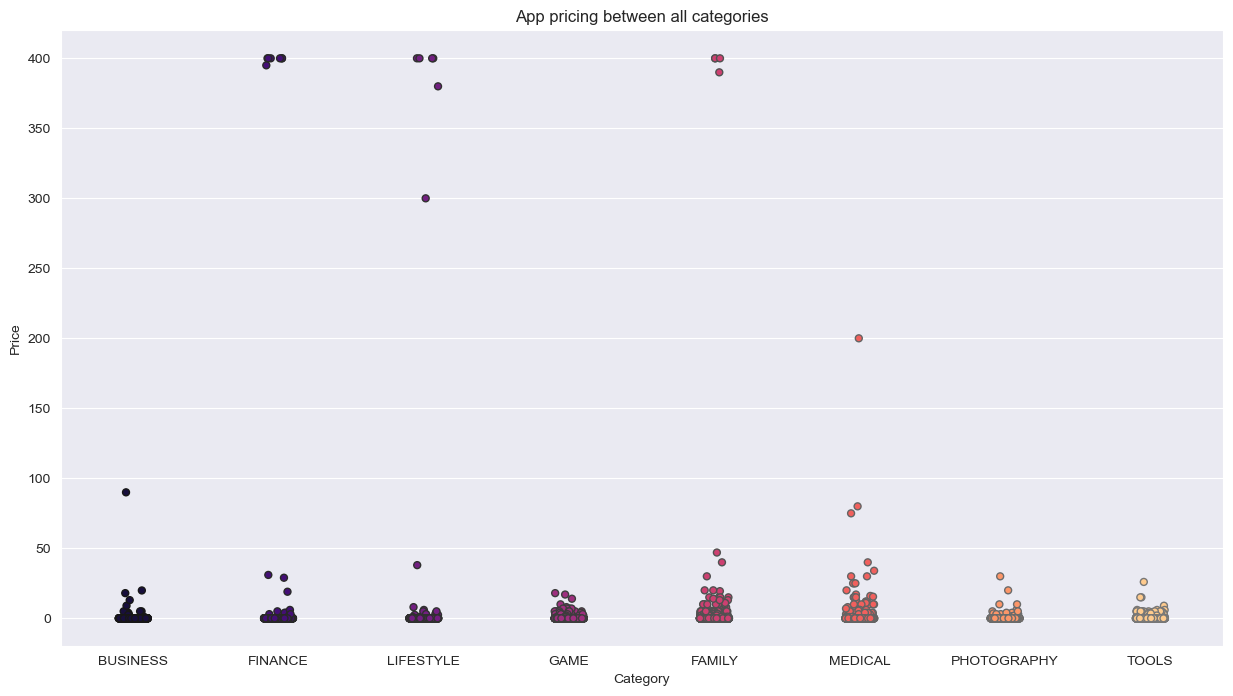

In [36]:
#7. Relation between App Category and App Price

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, palette="magma", linewidth=1)

ax.set_title('App pricing between all categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]


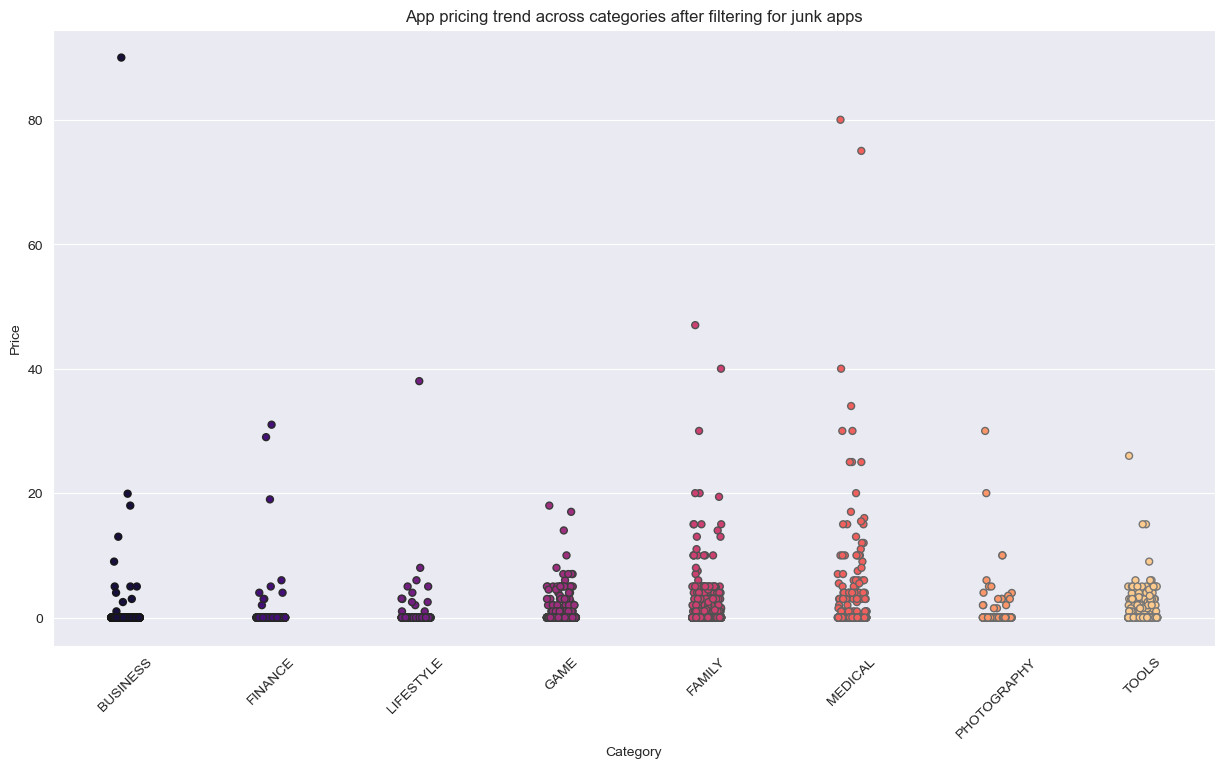

In [34]:
#8. Filter out "junk" apps

# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] <= 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)

ax = sns.stripplot(x ='Category', y ='Price' , data = apps_under_100 , jitter = True, linewidth = 1, palette="magma")
ax.set_title('App pricing trend across categories after filtering for junk apps')

plt.show()

In [37]:
#9. Popularity of Paid Apps vs Free Apps

trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of Paid vs Free Apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]

plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

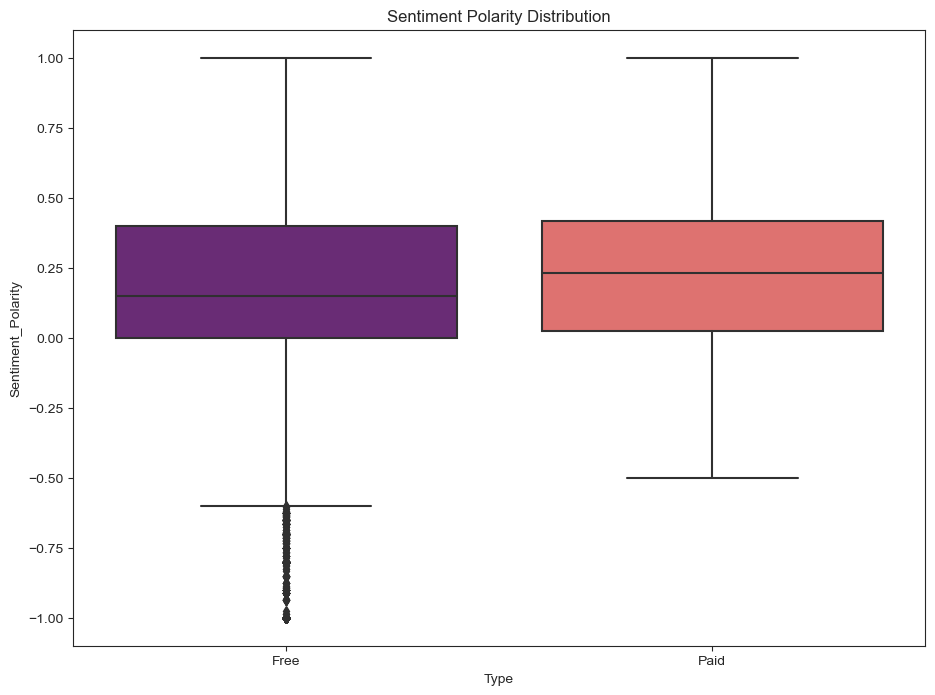

In [39]:
#10. Sentiment Analysis Of User Reviews

# Load user_reviews.csv
reviews_df = pd.read_csv('DATASETS/LAB 2/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on='App', how= 'inner')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x ='Type', y ='Sentiment_Polarity', data = merged_df,  palette="magma")

ax.set_title('Sentiment Polarity Distribution')